In [18]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from math import sqrt 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF

import os 


In [19]:
df = pd.read_csv('/Users/huntermarcelo/Documents/Volumetric_features.csv')

#Data Summary:
df.info()

df.head()

df.describe()

df.corr()

df = df[['S.No', 'Left-Lateral-Ventricle', 'Left-Inf-Lat-Vent', 'Left-Cerebellum-White-Matter', 
         'Left-Cerebellum-Cortex','Left-Thalamus', 'Left-Caudate', 'Left-Putamen', 'Left-Pallidum', 
         '3rd-Ventricle', '4th-Ventricle', 'Brain-Stem', 'Left-Hippocampus', 'Left-Amygdala', 'CSF', 
         'Left-Accumbens-area', 'Left-VentralDC', 'Left-vessel', 'Left-choroid-plexus','Right-Lateral-Ventricle', 
         'Right-Inf-Lat-Vent', 'Age']]
print (df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Columns: 141 entries, S.No to dataset
dtypes: float64(122), int64(19)
memory usage: 4.5 MB
      S.No  Left-Lateral-Ventricle  Left-Inf-Lat-Vent  \
0        1                 22916.9              982.7   
1        2                 22953.2              984.5   
2        3                 23320.4             1062.1   
3        4                 24360.0             1000.5   
4        5                 25769.4             1124.4   
...    ...                     ...                ...   
4221  4222                 27065.6              532.4   
4222  4223                 28408.8              912.7   
4223  4224                 34467.9             1659.6   
4224  4225                 31627.5             1334.4   
4225  4226                 14879.4              704.2   

      Left-Cerebellum-White-Matter  Left-Cerebellum-Cortex  Left-Thalamus  \
0                          15196.7                 55796.4         6855.5

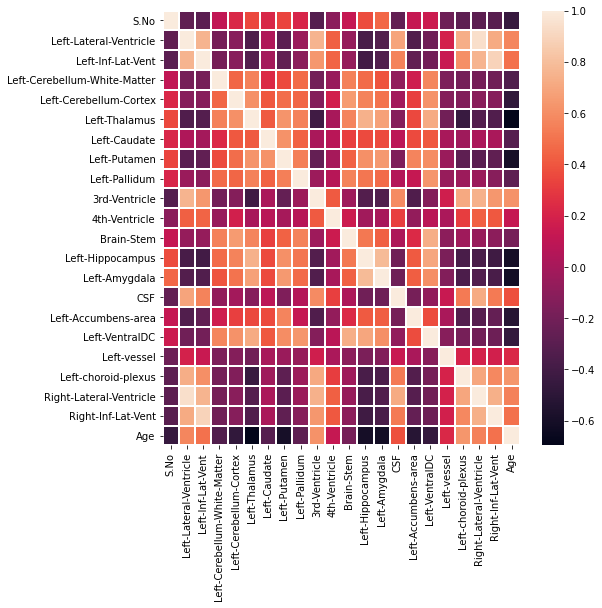

In [20]:
fig, axes = plt.subplots(figsize=(8,8))
sns.heatmap(data = df.corr(), linewidths = 1, ax = axes)
plt.show()

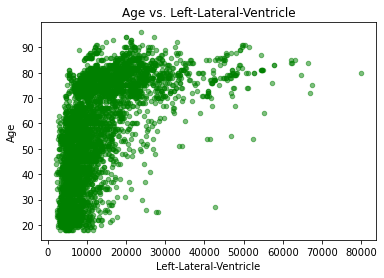

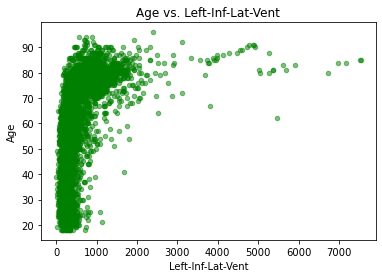

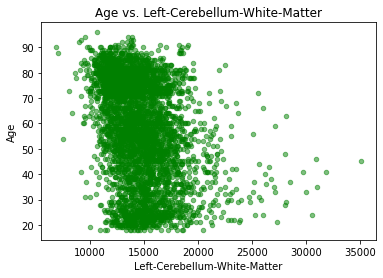

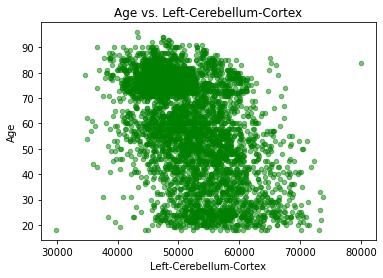

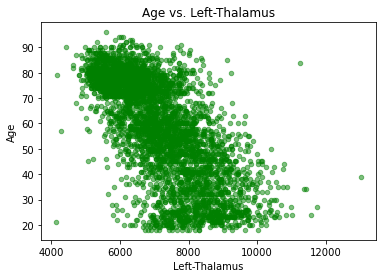

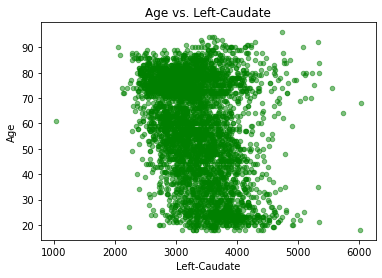

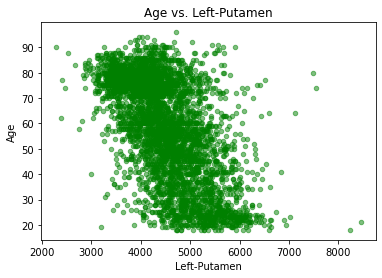

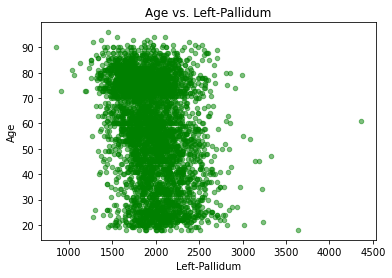

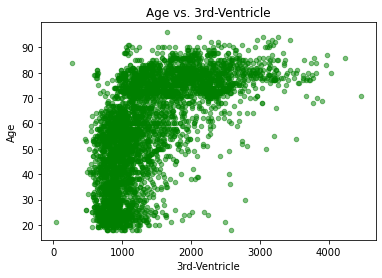

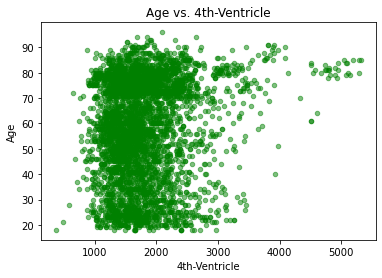

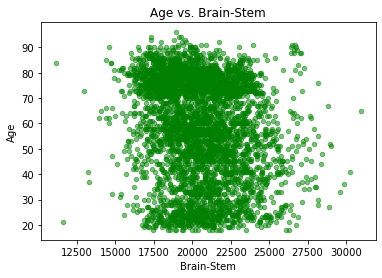

In [21]:
features = ['Left-Lateral-Ventricle', 'Left-Inf-Lat-Vent', 'Left-Cerebellum-White-Matter', 'Left-Cerebellum-Cortex',
         'Left-Thalamus', 'Left-Caudate', 'Left-Putamen', 'Left-Pallidum', '3rd-Ventricle', '4th-Ventricle', 'Brain-Stem']

for x in features:
  comb = 'Age vs. ' + x
  df.plot(kind='scatter', x = x, y = 'Age', alpha = 0.5, color='green', title = comb)

In [23]:
print(type(x))
x=x.to_numpy()
print(type(x))

print(type(y))
y=y.to_numpy()
print(type(y))


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [24]:
#Split Test/Train Datasets

x = df.drop(columns = ["S.No", "Age"])
y = df[['Age']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3380, 20)
(846, 20)
(3380, 1)
(846, 1)


Training Accuracy for MLR:  0.7777602265230169
Testing Accuracy for MLR:  0.7846670725323747
RMSE for Train:  9.431869518001859
RMSE for Test:  9.397936187418201


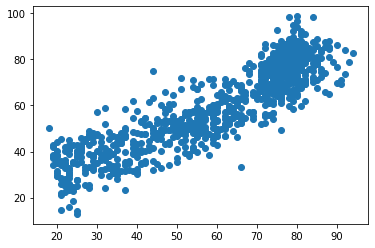

In [46]:
#Linear Regression 

multiple_linear_reg = LinearRegression()
multiple_linear_reg.fit(x_train, y_train)

y_pred_MLR_train = multiple_linear_reg.predict(x_train)
y_pred_MLR_test = multiple_linear_reg.predict(x_test)

accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for MLR: ", accuracy_MLR_train)

accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for MLR: ", accuracy_MLR_test)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Train: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Test: ", RMSE_MLR_test)

plt.scatter(y_test,y_pred_MLR_test)
plt.show()


Accuracy for MLR (Train):  -0.5666138557298908
Accuracy for MLR (Test):  -0.9072516408980338
RMSE for Neural Network (Train):  25.041934358324397
RMSE for Neural Network (Test):  27.969278801213758


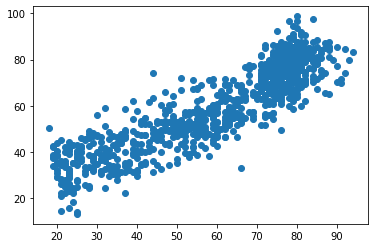

In [47]:
#Neural Network Regression 
x = df.drop(columns = ["S.No", "Age"])
y = df[["Age"]]  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

nnr = MLPRegressor(random_state=1, max_iter=10000).fit(x_train, np.ravel(y_train,order='C'))

y_pred_train = nnr.predict(x_train)
y_pred_test = nnr.predict(x_test)

nnr_output = nnr.score(x_test, y_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Accuracy for NNR (Train): ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Accuracy for NNR (Test): ", accuracy_test)

rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Neural Network (Train): ", rmse_train)

rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Neural Network (Test): ", rmse_test)

plt.scatter(y_test, y_pred)
plt.show()


RMSE for KNN (Train): 6.015297313944501
RMSE for KNN (Test): 5.941524547453334


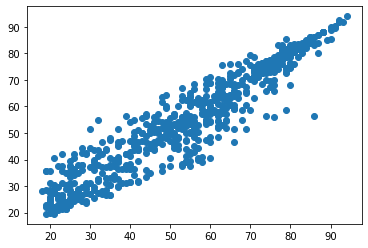

In [44]:
#KNN Regression
x = df.drop(columns = ["S.No", "Age"])
y = df[["Age"]] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=2).fit(x, y)

y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

knn_output = knn.score(x_test, y_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Accuracy for KNN (Train): ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Accuracy for KNN (Test): ", accuracy_test)

rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for KNN (Train):", rmse_train)

rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for KNN (Test):", rmse_test)

plt.scatter(y_test, y_pred_test)
plt.show()


RMSE for GPR (Train): 9.437257244592487
RMSE for GPR (Test): 9.349074208884655


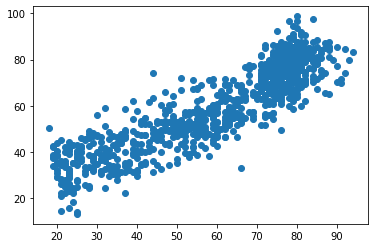

In [45]:
#Gaussian Process Regression

x = df.drop(columns = ["S.No", "Age"])
y = df[["Age"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel).fit(x, y)
gpr.score(x, y)

y_pred_train = gpr.predict(x_train)
y_pred_test = gpr.predict(x_test)

nnr_output = gpr.score(x_test, y_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Accuracy for GPR (Train): ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Accuracy for GPR (Test): ", accuracy_test)

rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for GPR (Train):", rmse_train)

rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for GPR (Test):", rmse_test)

plt.scatter(y_test, y_pred)
plt.show()
